# Mach-Zehnder Interferometer (MZI)

**We use SiEPIC EBeam library in this tutorial.**

   This notebook walks through the process of setting up and simulating a mach-zehnder interferometer device using the OPICS package. 

   A mach-zehnder interferometer is a basic waveguide interference device. It consists of two couplers (or Y branches) connected by two waveguides of different length (see below). The difference between the two waveguide lengths causes differential delay, which contributes to the frequency dependent interference pattern.

<img style="width:70%;height:50%;" src="../_static/_images/MZI1.svg">

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import opics


   ____  ____  _______________
  / __ \/ __ \/  _/ ____/ ___/
 / / / / /_/ // // /    \__ \
/ /_/ / ____// // /___ ___/ /
\____/_/   /___/\____//____/

OPICS version 0.3.1


### Import component library
Import `ebeam` library from `libs` module.

In [2]:
ebeam = opics.libraries.ebeam

### Define network 
Create an instance of `Network` class, which is used to add, connect, and simulate circuit components. 

In [3]:
#defining custom frequency data points for a component
f = np.linspace(opics.C*1e6/1.5, opics.C*1e6/1.6, 2000)
circuit_name = "mzi"
circuit = opics.Network(network_id=circuit_name, f=f)

In [4]:
ebeam.Waveguide?

### Add circuit components

Add grating couplers, 3dB power splitters (e.g. Y-splitter or Y-branch), and waveguides to circuit. You can define custom frequency data points for a component as well (see the example for output_GC).

In [5]:


#define component instances
input_gc  = circuit.add_component(ebeam.GC)
y1 =   circuit.add_component(ebeam.Y)
wg1 =  circuit.add_component(ebeam.Waveguide, params=dict(length=50e-6))
wg2 =  circuit.add_component(ebeam.Waveguide, params=dict(length=150e-6))
y2 =  circuit.add_component(ebeam.Y)
output_gc = circuit.add_component(ebeam.GC)


### Define circuit connectivity

In this section, we define the component connections. The connections are defined using `Network.connect`, e.g.

`Network.connect(component1, component1_port, component2, component2_port)`

In [6]:
#define circuit connectivity
circuit.connect(input_gc, 1, y1, 0)
circuit.connect(y1, 1, wg1, 0)
circuit.connect(y1, 2, wg2, 0)
circuit.connect(y2, 0, output_gc, 1)
circuit.connect(wg1, 1, y2, 1)
circuit.connect(wg2, 1, y2, 2)

### Simuate the circuit

In [7]:
sim_start = time.time()

#simulate network
circuit.simulate_network()

print("simulation finished in %ss"%(str(round(time.time()-sim_start,2))))

simulation finished in 0.02s


### Visualize the simulation result

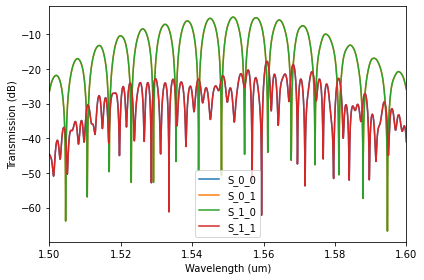

In [8]:
circuit.sim_result.plot_sparameters(show_freq=False, scale="log")